# Numerical Integration Methods | Runge-Kutta

> In numerical analysis, the Runge–Kutta methods are a family of implicit and explicit iterative methods, which include the well-known routine called the Euler Method, used in temporal discretization for the approximate solutions of ordinary differential equations. These methods were developed around 1900 by the German mathematicians C. Runge and M. W. Kutta.

[Wikipedia](https://en.wikipedia.org/wiki/Runge-Kutta_methods)

[More context available here](http://people.bu.edu/andasari/courses/Fall2015/LectureNotes/Lecture9_1Oct2015.pdf)

[Original code adapted from here](http://people.bu.edu/andasari/courses/numericalpython/python.html)

## Setup

* Code written in Jupyter Lab
* SageMath 8.9 Kernel

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from math import sin

In [2]:
def feval(funcName, *args):
    return eval(funcName)(*args)

In [206]:
def frange(start, stop, step):
         i = start
         while i < stop:
             yield i
             i += step
 

## 4th order Runge-Kutta Method

In [135]:
def rungekutta(func, yinit, x_range, h):
    m = len(yinit)
    n = int((x_range[-1] - x_range[0])/h)
    
    x = x_range[0]
    y = yinit
        
    # Containers for solutions
    xsol = np.empty(0)
    xsol = np.append(xsol, x)
   
    ysol = y

    for i in range(n):
        k1 = feval(func, x, y)
        
        yp2 = y + k1*(h/2)
        
        k2 = feval(func, x+h/2, yp2)
        
        yp3 = y + k2*(h/2)

        k3 = feval(func, x+h/2, yp3)

        yp4 = y + k3*h

        k4 = feval(func, x+h, yp4)

        for j in range(m):
            y[j] = y[j] + (h/6)*(k1[j] + 2*k2[j] + 2*k3[j] + k4[j])

        x = x + h
        xsol = np.append(xsol, x)
        
         #for r in range(len(y)):
         #   ysol = np.append(ysol, y[r])
        ysol = np.vstack((ysol, y))
        

    return [xsol, ysol]


In [123]:
np.empty(3)

array([0.1, 0.2, 0.3])

## Comparison

Create a function

In [260]:
def myFunc(t, y):
    dy = np.zeros((len(y)))
    #dy[0] = np.exp(-2*x) - 2*y[0]
    dy[0] = sin(y[0])
    dy[1] = cos(y[1])
    return dy

Initial conditions

In [238]:
step = 0.1
xRange = np.array([0.0, 10*n(pi,4)])
y0 = np.array([0.0,0.0])

Run numerical solvers

In [166]:
[ts, yRK] = rungekutta('myFunc', y0, xRange, step)

Plot the solutions

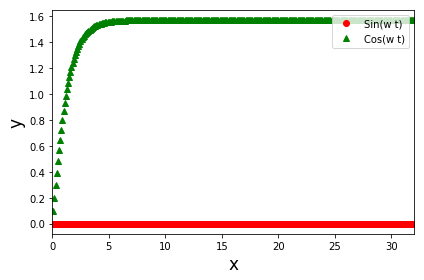

In [167]:
plt.plot(ts, yRK[:,0], 'or')
plt.plot(ts, yRK[:,1], '^g')
plt.xlim(xRange[0], xRange[1])
plt.legend(["Sin(w t)","Cos(w t)"], loc=1)
plt.xlabel('x', fontsize=17)
plt.ylabel('y', fontsize=17)
plt.tight_layout()
plt.show()

Export the figure

/usr/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:5: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.


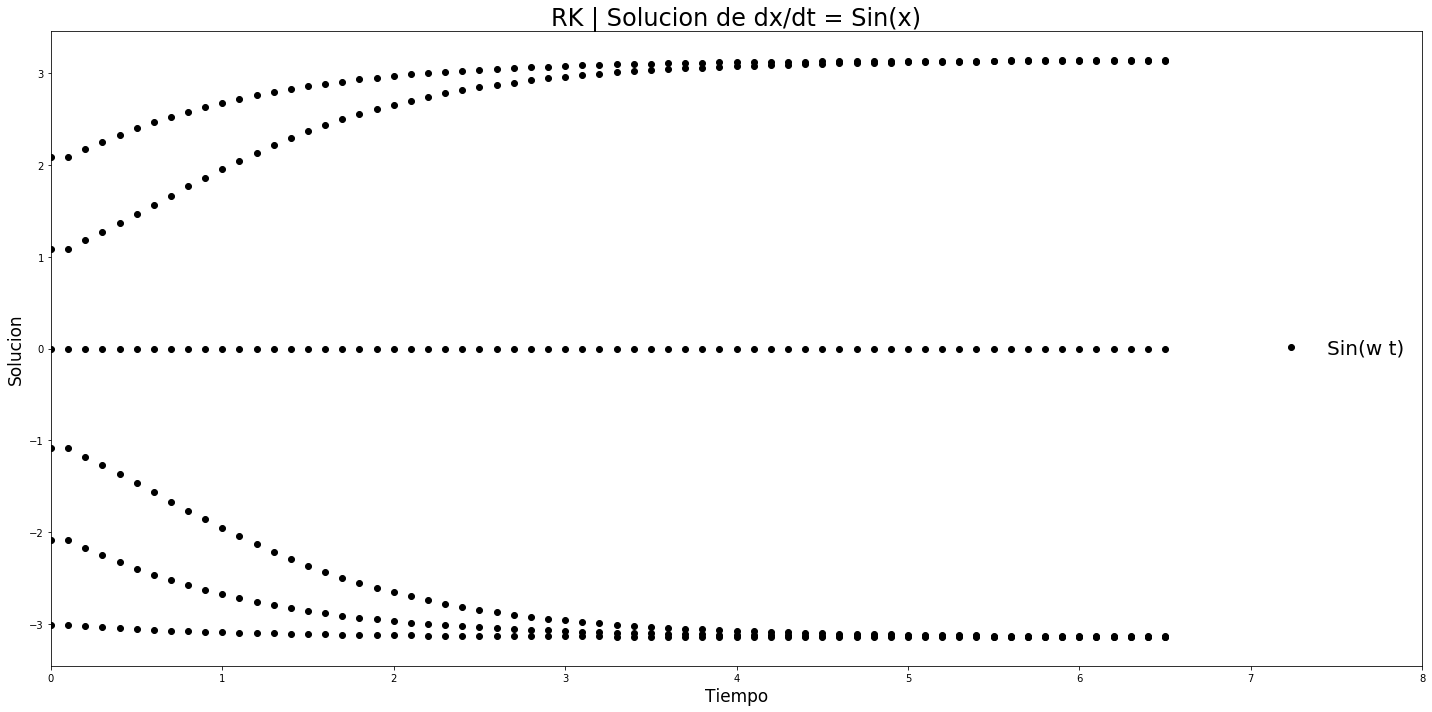

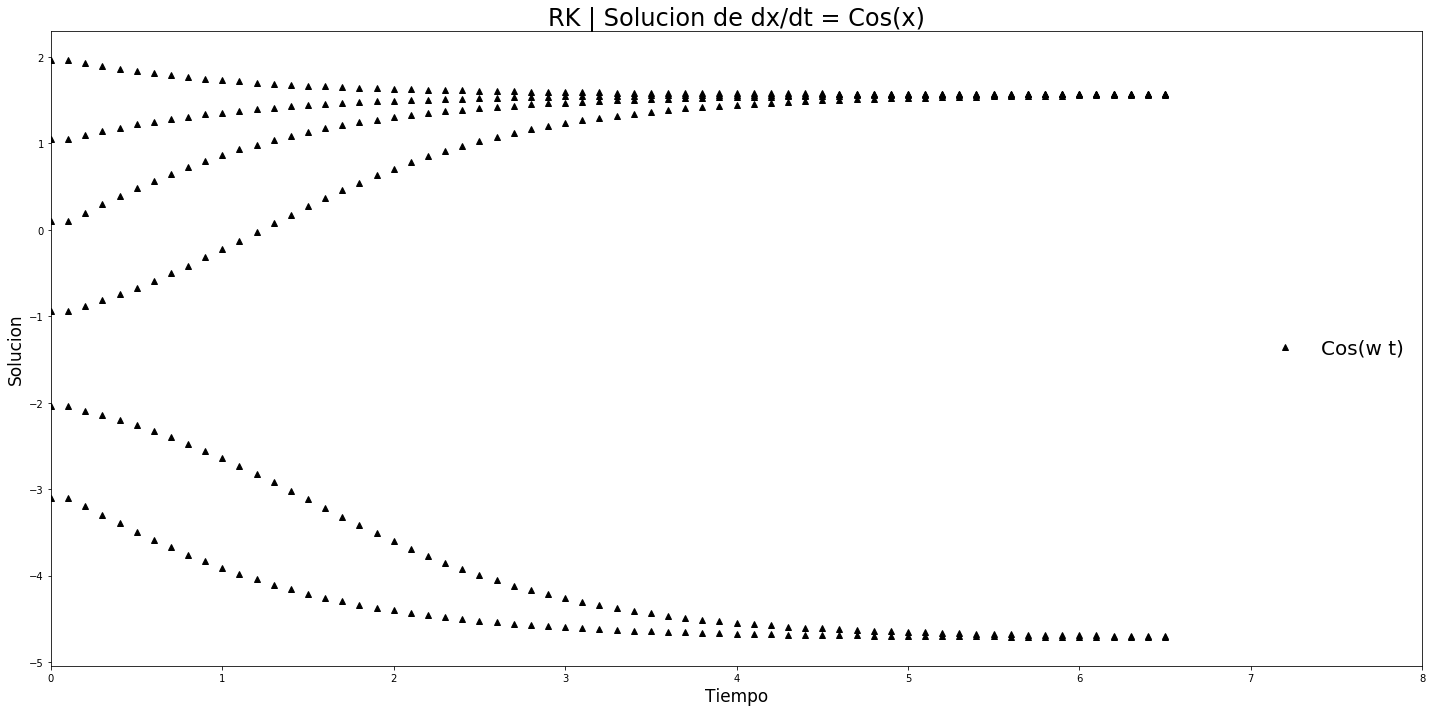

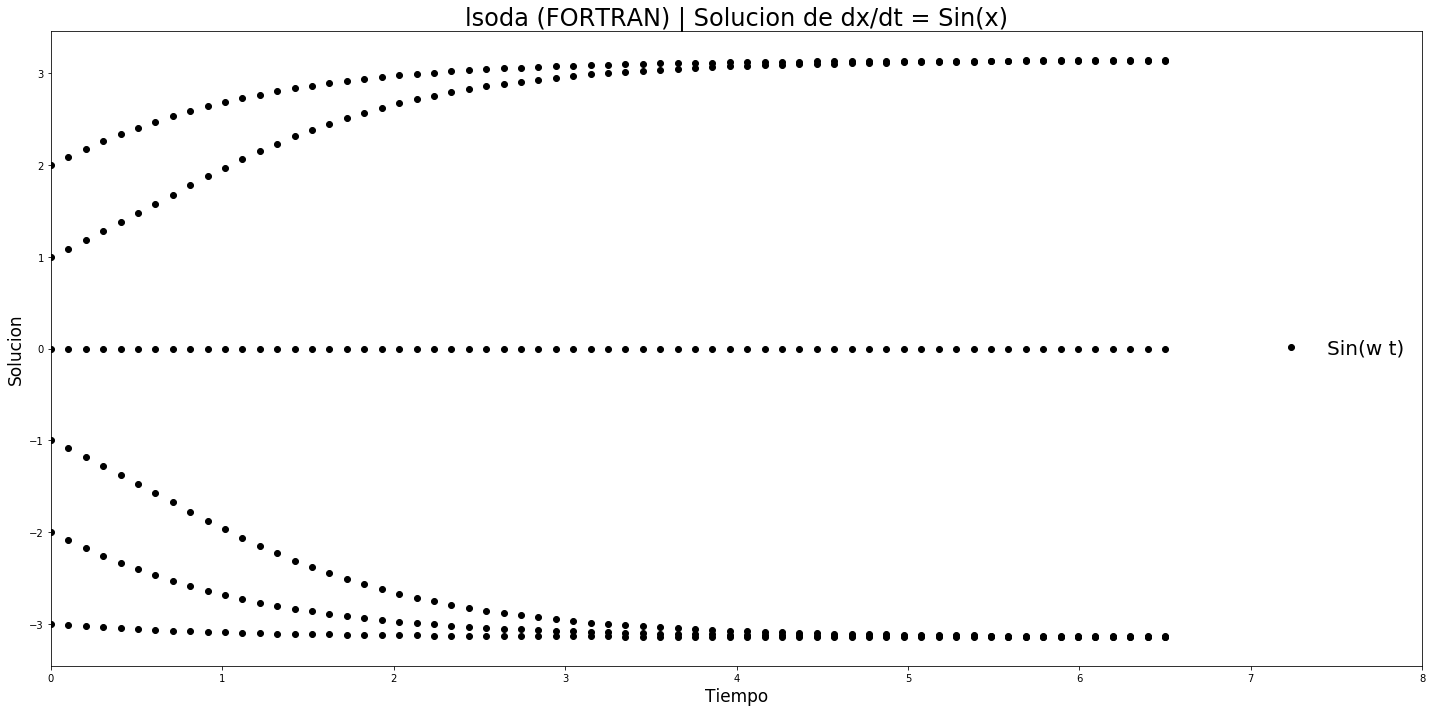

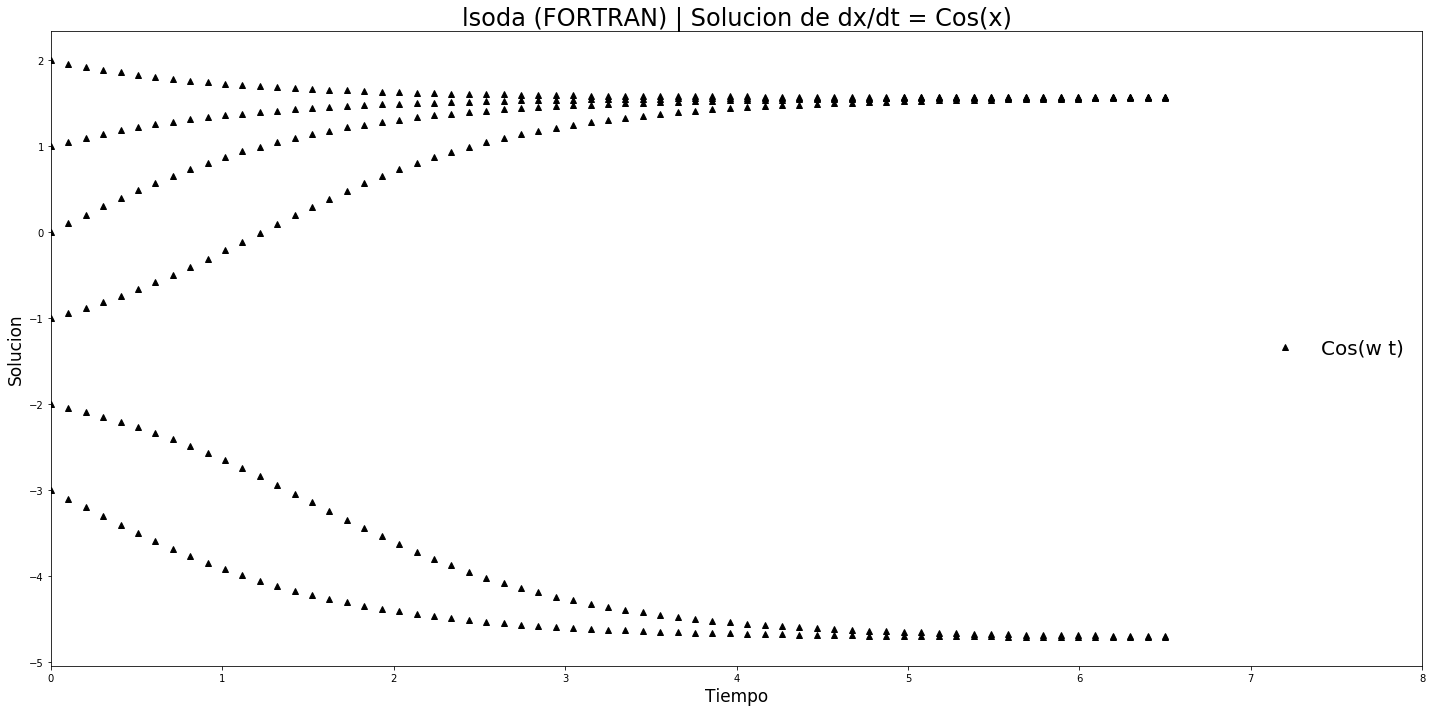

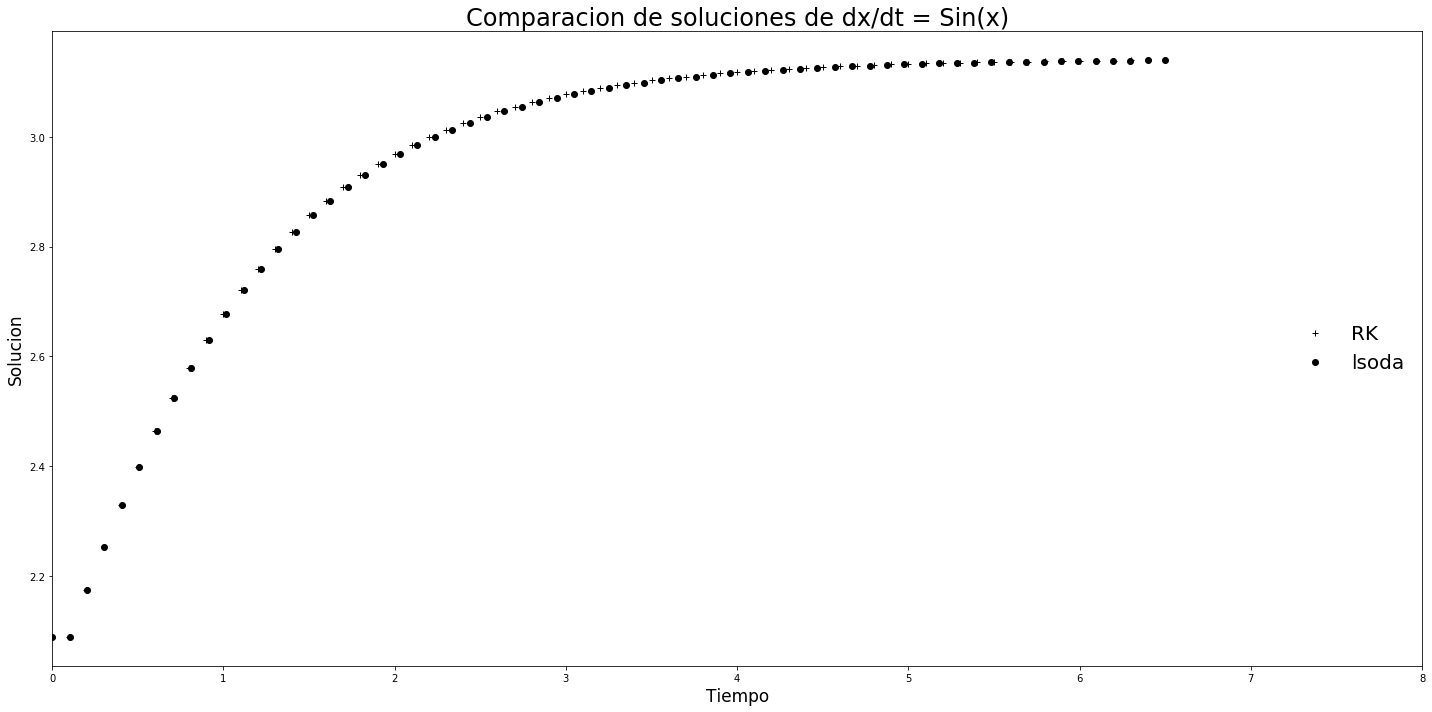

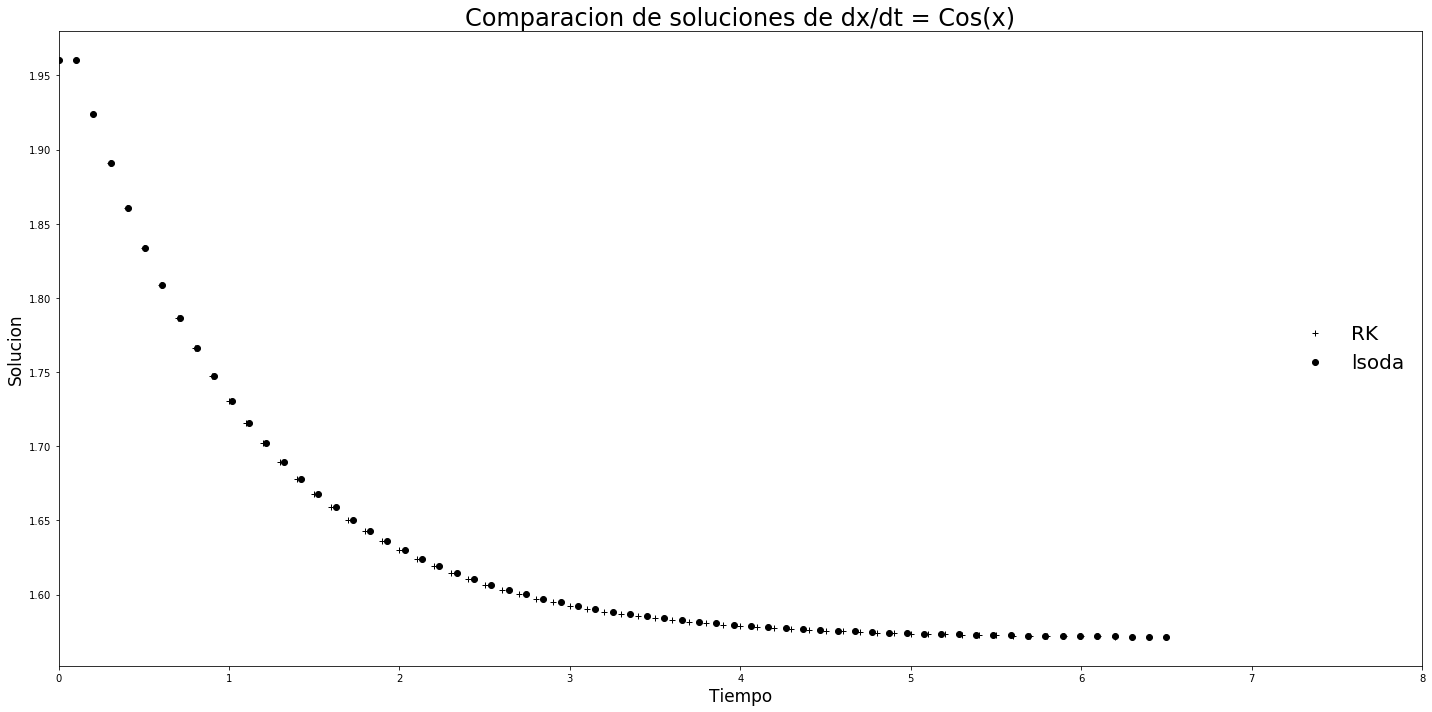

In [314]:
h=0.1
for i in frange(-3.0,3.0,1):
    x0 = np.array([i,i])
    t = np.array([0.0, 2*n(pi,4)])
    t2 = np.linspace(0, t[1], t[1]/h)
        
    [ts, f] = rungekutta('myFunc', x0, t, h)
    
    x0 = np.array([i,i])
    g = x0
    tempSol = integrate.odeint(myFunc, x0,t2,tfirst=True)
    g = np.vstack((g,tempSol))
    
    plt.figure(num=1,figsize=(20,10))
    plt.plot(ts, f[:,0], 'ok')
    plt.xlim(t[0], 8)
    plt.legend(["Sin(w t)"], loc=5,fontsize=20,frameon=False)
    plt.xlabel('Tiempo', fontsize=17)
    plt.ylabel('Solucion', fontsize=17)
    plt.title("RK | Solucion de dx/dt = Sin(x)",fontsize=24)
    plt.tight_layout()
    
    plt.figure(num=2,figsize=(20,10))
    plt.plot(ts, f[:,1], '^k')
    plt.xlim(t[0], 8)
    plt.legend(["Cos(w t)"], loc=5,fontsize=20,frameon=False)
    plt.xlabel('Tiempo', fontsize=17)
    plt.ylabel('Solucion', fontsize=17)
    plt.title("RK | Solucion de dx/dt = Cos(x)",fontsize=24)
    plt.tight_layout()
    
    plt.figure(num=3,figsize=(20,10))
    plt.plot(t2, g[1:,0], 'ok')
    plt.xlim(t[0], 8)
    plt.legend(["Sin(w t)"], loc=5,fontsize=20,frameon=False)
    plt.xlabel('Tiempo', fontsize=17)
    plt.ylabel('Solucion', fontsize=17)
    plt.title("lsoda (FORTRAN) | Solucion de dx/dt = Sin(x)",fontsize=24)
    plt.tight_layout()
    
    plt.figure(num=4,figsize=(20,10))
    plt.plot(t2, g[1:,1], '^k')
    plt.xlim(t[0], 8)
    plt.legend(["Cos(w t)"], loc=5,fontsize=20,frameon=False)
    plt.xlabel('Tiempo', fontsize=17)
    plt.ylabel('Solucion', fontsize=17)
    plt.title("lsoda (FORTRAN) | Solucion de dx/dt = Cos(x)",fontsize=24)
    plt.tight_layout()
    
temp2 = f[0:(len(g)-1)]    
    
plt.figure(num=5,figsize=(20,10))
plt.plot(ts,f[:,0],'+k',t2, temp2[:,0], 'ok')
plt.xlim(t[0], 8)
plt.legend(["RK","lsoda"], loc=5,fontsize=20,frameon=False)
plt.xlabel('Tiempo', fontsize=17)
plt.ylabel('Solucion', fontsize=17)
plt.title("Comparacion de soluciones de dx/dt = Sin(x)",fontsize=24)
plt.tight_layout()

plt.figure(num=6,figsize=(20,10))
plt.plot(ts,f[:,1],'+k',t2, temp2[:,1], 'ok')
plt.xlim(t[0], 8)
plt.legend(["RK","lsoda"], loc=5,fontsize=20,frameon=False)
plt.xlabel('Tiempo', fontsize=17)
plt.ylabel('Solucion', fontsize=17)
plt.title("Comparacion de soluciones de dx/dt = Cos(x)",fontsize=24)
plt.tight_layout()
    
plt.show()

In [324]:
print(f)

print("\n")

print(g)

[[2.08894494 1.96023201]
 [2.08894494 1.96023201]
 [2.17359988 1.9239768 ]
 [2.25359647 1.89096768]
 [2.3287086  1.86094692]
 [2.39883728 1.8336687 ]
 [2.46399138 1.80890099]
 [2.52426678 1.78642663]
 [2.57982599 1.7660436 ]
 [2.63087968 1.74756503]
 [2.67767067 1.73081872]
 [2.72046068 1.71564656]
 [2.75951996 1.70190377]
 [2.79511917 1.68945805]
 [2.82752353 1.67818874]
 [2.85698865 1.66798593]
 [2.88375778 1.65874967]
 [2.90806006 1.65038911]
 [2.93010974 1.64282175]
 [2.95010584 1.63597274]
 [2.96823231 1.62977417]
 [2.98465855 1.6241645 ]
 [2.99953999 1.61908793]
 [3.01301892 1.61449392]
 [3.02522528 1.61033668]
 [3.03627756 1.60657477]
 [3.04628364 1.60317063]
 [3.05534165 1.60009027]
 [3.06354075 1.59730293]
 [3.07096186 1.59478075]
 [3.07767845 1.59249852]
 [3.08375712 1.59043343]
 [3.08925825 1.58856482]
 [3.09423656 1.586874  ]
 [3.09874163 1.58534406]
 [3.10281837 1.58395971]
 [3.10650743 1.58270708]
 [3.10984564 1.58157364]
 [3.11286633 1.58054806]
 [3.11559967 1.57962008]


In [312]:
len(temp2)

65

In [311]:
len(t2)

65